# Generating noise in tabular data

This tutorial shows how to generate noise on pre-existing tabular data and to visualize both the original and the transformed data




In [2]:
from sklearn.datasets import make_blobs
from badgers.transforms.tabular_data.noise import GaussianNoiseGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_noise(X, y, Xt):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    for label in np.unique(y):
        ix = np.where(y == label)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{label}', label = f'{label}')
        axes[1].scatter(Xt[ix,0],Xt[ix,1],c = f'C{label}', label = f'{label}')
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel('dimension 0', fontsize=10)
    axes[1].set_xlabel('dimension 0', fontsize=10)
    axes[0].set_ylabel('dimension 1', fontsize=10)
    axes[1].set_ylabel('dimension 1', fontsize=10)
    axes[0].legend()
    axes[1].legend()
    return fig, axes


## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [4]:
X, y = make_blobs(random_state=0)

## Generate noise

The transformer applies an additive Gaussian noise to each dimension

In [5]:
trf = GaussianNoiseGenerator(noise_std=0.25)
Xt, yt = trf.generate(X.copy(), y)

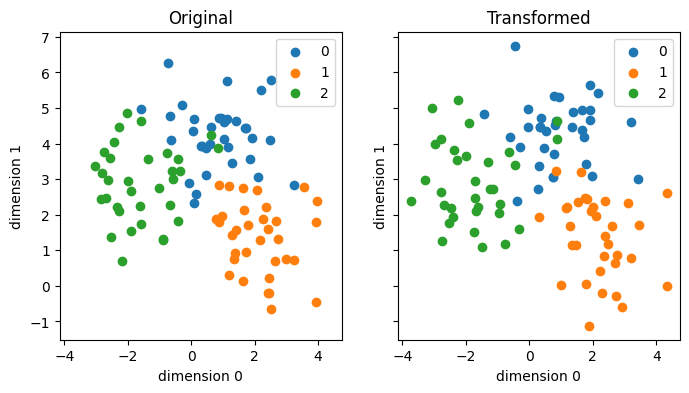

In [6]:
fig, axes = plot_noise(X, y, Xt)